In [ ]:
# 10 models each
# logit
# 0
# 0.1
# 0.5
# 1
# 5
# 10

import pandas as pd
import numpy as np

from fit_adversarial import fit_adversarial_regressor, test_model
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("all_vals_race1_interestrate1.csv")
from sklearn.model_selection import train_test_split

df.drop(
    columns=[
        "IsTestData",
        "IsCalibrateData",
        "v1",
        "istestdata2",
        "iscalibratedata2",
    ],
    inplace=True,
)


df["minority"] = (
    (df["race_dum_Black"] == 1)
    | (df["race_dum_Native Am, Alaska, Hawaii"] == 1)
    | (df["race_dum_White hisp"] == 1)
)

C:\Users\bencu\AppData\Local\Temp\ipykernel_23532\3910315459.py:7: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_vals_race1_interestrate1.csv")


In [ ]:
race_columns = [
    "race_dum_Unknown",
    "race_dum_Asian",
    "race_dum_Black",
    "race_dum_Native Am, Alaska, Hawaii",
    "race_dum_White hisp",
    "race_dum_White_non_hisp",
]

ethnicity_column = "ethnicity_dum_hisp"

features = df.drop(
    columns=["default", "cur_int_rate", "sato", "default_age"] + race_columns + [ethnicity_column],
    axis=1,
)

target = df["default"]


sensitive_features = df[["minority"]].values

In [3]:
import math

features = features.applymap(
    lambda x: x if isinstance(x, (int, float)) and not math.isnan(x) else 0
)

C:\Users\bencu\AppData\Local\Temp\ipykernel_23532\2393365648.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  features = features.applymap(


In [4]:
X_train, X_val, y_train, y_val, sensitive_train, sensitive_val = train_test_split(
    features, target, sensitive_features, test_size=0.3, random_state=42
)

In [5]:
baseline_m, baseline_s = fit_adversarial_regressor(
    alpha=0,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
    baseline="logit"
)

Prediction probabilities: [0.07108626 0.00672935 0.01100801 0.01862442 0.43996963]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9363
Precision: 0.5178
ROC AUC: 0.8365
Confusion Matrix:
[[1212513    2367]
 [  80261    2542]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.52      0.03      0.06     82803

    accuracy                           0.94   1297683
   macro avg       0.73      0.51      0.51   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.036762527416146024, 'separation': 0.031952056235593974, 'sufficiency': 7.887754291027442e-07}, 'std_metrics': {'independence': 0.00012330617321278472, 'separation': 0.00012272732168843437, 'sufficiency': 6.700396639046568e-07}}


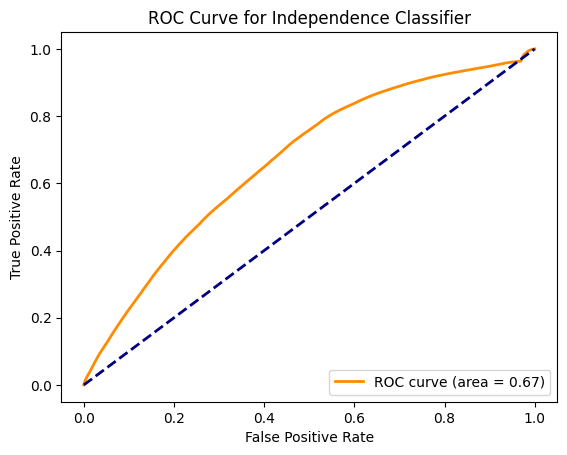

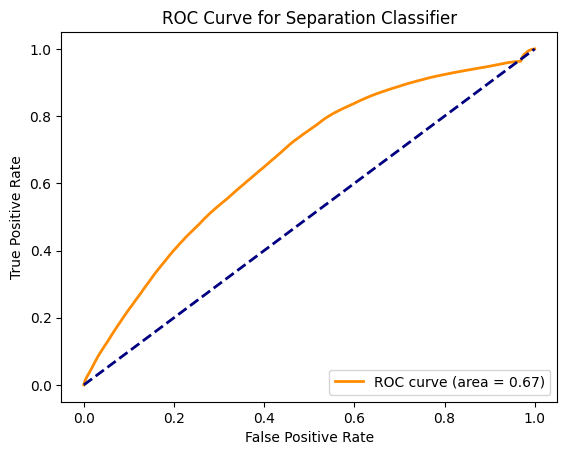

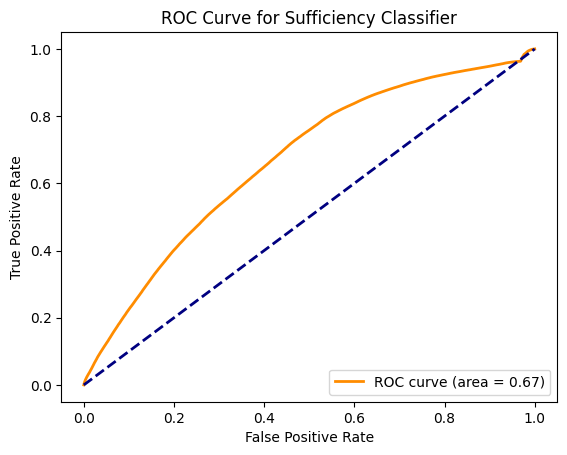

{'accuracy': 0.9363265142565634,
 'precision': 0.5178244041556325,
 'roc_auc': 0.836528252633024,
 'confusion_matrix': array([[1212513,    2367],
        [  80261,    2542]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.52      0.03      0.06     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.73      0.51      0.51   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   6.585012511523772e-06,
   6.585012511523772e-06,
   7.408139075464243e-06,
   7.408139075464243e-06,
   1.0700645331226129e-05,
   1.0700645331226129e-05,
   1.2346898459107072e-05,
   1.2346898459107072e-05,
   1.3170025023047544e-05,
   1.317002502

In [ ]:
test_model(
    baseline_m,
    baseline_s,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)

In [7]:
mitigator0, scaler0 = fit_adversarial_regressor(
    alpha=0,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False
)

Epoch 1/12, Average adversary loss: 0.499800. Average predictor loss: 0.197905
Current alpha 0, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.130644, Predictor Loss: 1.607093
Epoch 2/12, Average adversary loss: 0.498494. Average predictor loss: 0.193043
Current alpha 0, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.139716, Predictor Loss: 1.564878
Epoch 3/12, Average adversary loss: 0.496008. Average predictor loss: 0.191044
Current alpha 0, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.050053, Predictor Loss: 1.544430
Epoch 4/12, Average adversary loss: 0.494212. Average predictor loss: 0.189590
Current alpha 0, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 4.978248, Predictor Loss: 1.552947
Epoch 5/12, Average adversary loss: 0.496094. Average predictor loss: 0.189406
Current alpha 0, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 5.040482, Predictor Loss: 1.561876
Epoch 6/12, Average adversary loss: 0.49

Prediction probabilities: [0.0173607  0.00656486 0.01219547 0.01905094 0.45371628]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9365
Precision: 0.6112
ROC AUC: 0.8436
Confusion Matrix:
[[1214228     652]
 [  81778    1025]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.61      0.01      0.02     82803

    accuracy                           0.94   1297683
   macro avg       0.77      0.51      0.50   1297683
weighted avg       0.92      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.014387763455029587, 'separation': 0.010219138233796398, 'sufficiency': 0.0007615754939347116}, 'std_metrics': {'independence': 8.047885775430884e-05, 'separation': 6.833728507625238e-05, 'sufficiency': 1.838190651545575e-05}}


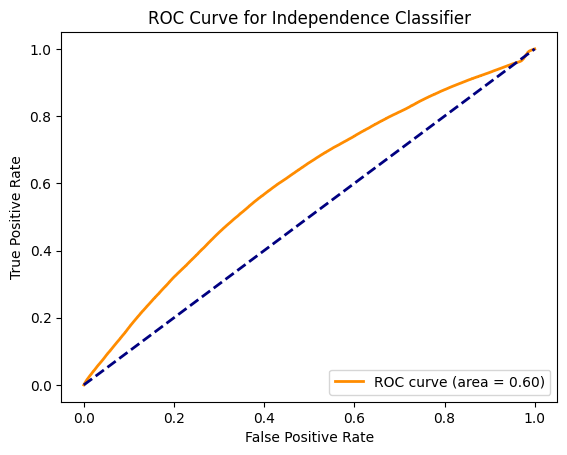

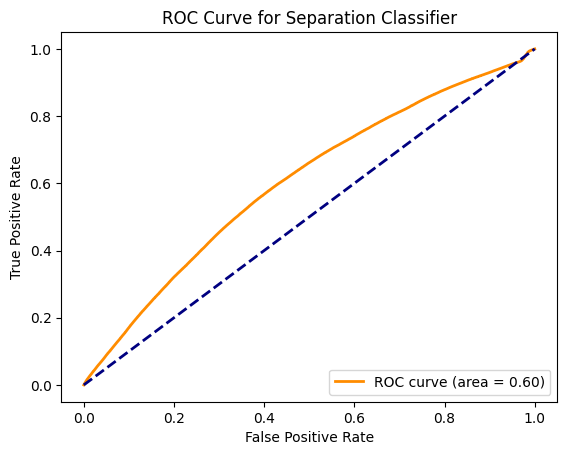

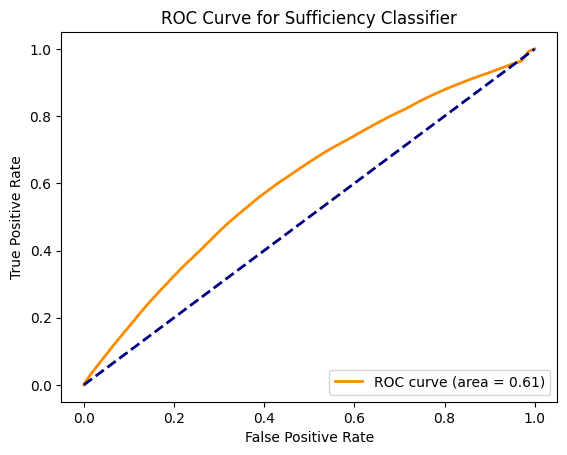

{'accuracy': 0.9364790938927303,
 'precision': 0.6112104949314252,
 'roc_auc': 0.8436256806759546,
 'confusion_matrix': array([[1214228,     652],
        [  81778,    1025]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.61      0.01      0.02     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.77      0.51      0.50   1297683\nweighted avg       0.92      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   0.0,
   8.231265639404715e-07,
   8.231265639404715e-07,
   1.646253127880943e-06,
   1.646253127880943e-06,
   2.4693796918214146e-06,
   2.4693796918214146e-06,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   6.585012511523772e-06,
   6.585012511523772e-06,
   7.408139075464243e-06,
   7.408

In [8]:
test_model(
    mitigator0,
    scaler0,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)


In [9]:
mitigator1, scaler1 = fit_adversarial_regressor(
    alpha=1,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.503638. Average predictor loss: 0.204397
Current alpha 1, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.102662, Predictor Loss: 1.579868
Epoch 2/12, Average adversary loss: 0.501581. Average predictor loss: 0.192812
Current alpha 1, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.033784, Predictor Loss: 1.553961
Epoch 3/12, Average adversary loss: 0.501638. Average predictor loss: 0.191914
Current alpha 1, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.064782, Predictor Loss: 1.583600
Epoch 4/12, Average adversary loss: 0.501556. Average predictor loss: 0.191309
Current alpha 1, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 5.045118, Predictor Loss: 1.526451
Epoch 5/12, Average adversary loss: 0.501516. Average predictor loss: 0.190601
Current alpha 1, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 5.032627, Predictor Loss: 1.554761
Epoch 6/12, Average adversary loss: 0.50

Prediction probabilities: [0.00547438 0.00279741 0.00757506 0.01551405 0.3246463 ]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9365
Precision: 0.5662
ROC AUC: 0.8334
Confusion Matrix:
[[1213737    1143]
 [  81311    1492]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.57      0.02      0.03     82803

    accuracy                           0.94   1297683
   macro avg       0.75      0.51      0.50   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.0014364340856234752, 'separation': 0.004810543973262667, 'sufficiency': 0.008332202779528605}, 'std_metrics': {'independence': 2.2413435386412443e-05, 'separation': 3.8856026677373894e-05, 'sufficiency': 5.6723750773396975e-05}}


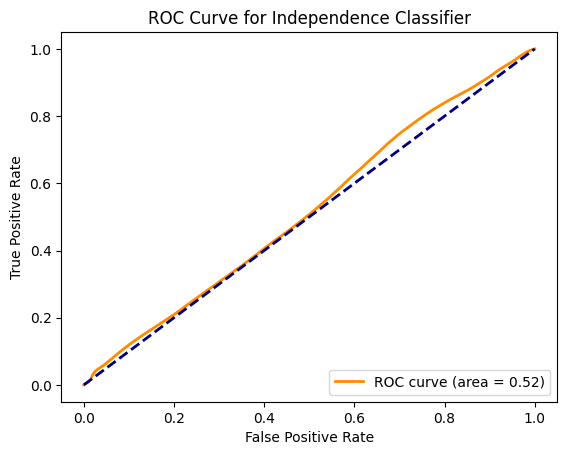

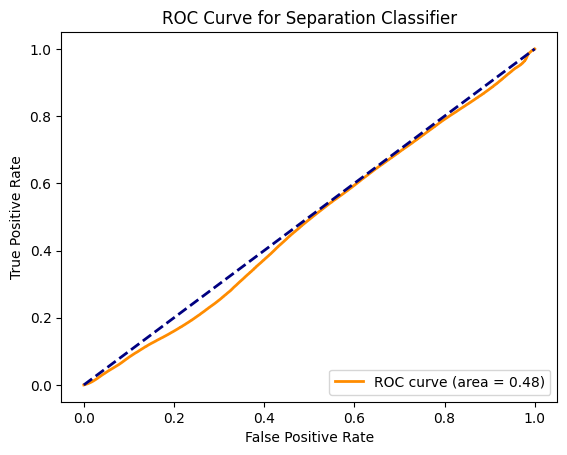

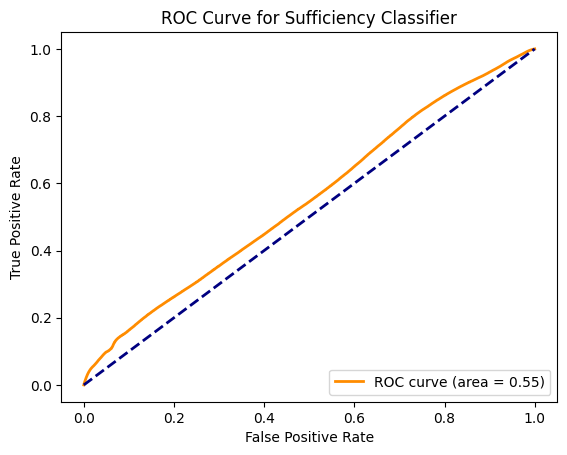

{'accuracy': 0.9364605993913768,
 'precision': 0.5662239089184061,
 'roc_auc': 0.8333781624474275,
 'confusion_matrix': array([[1213737,    1143],
        [  81311,    1492]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.57      0.02      0.03     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.75      0.51      0.50   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   6.585012511523772e-06,
   6.585012511523772e-06,
   7.408139075464243e-06,
   7.408139075464243e-06,
   8.231265639404716e-06,
   8.231265639404716e-06,
   9.054392203345186e-06,
   9.0543922033451

In [10]:
test_model(
    mitigator1,
    scaler1,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)

In [11]:
mitigator5, scaler5 = fit_adversarial_regressor(
    alpha=5,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.505273. Average predictor loss: 0.276802
Current alpha 5, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.035482, Predictor Loss: 1.915591
Epoch 2/12, Average adversary loss: 0.501775. Average predictor loss: 0.206305
Current alpha 5, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.059598, Predictor Loss: 1.626442
Epoch 3/12, Average adversary loss: 0.501812. Average predictor loss: 0.207714
Current alpha 5, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.035393, Predictor Loss: 1.633593
Epoch 4/12, Average adversary loss: 0.501517. Average predictor loss: 0.192520
Current alpha 5, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 5.036334, Predictor Loss: 1.494311
Epoch 5/12, Average adversary loss: 0.501751. Average predictor loss: 0.206099
Current alpha 5, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 4.993790, Predictor Loss: 1.606072
Epoch 6/12, Average adversary loss: 0.50

Prediction probabilities: [0.00840385 0.00177904 0.00410251 0.00943546 0.2404102 ]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9364
Precision: 0.5509
ROC AUC: 0.8357
Confusion Matrix:
[[1213637    1243]
 [  81278    1525]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.55      0.02      0.04     82803

    accuracy                           0.94   1297683
   macro avg       0.74      0.51      0.50   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.0005768167645354967, 'separation': 0.0028887141812772308, 'sufficiency': 0.007271767702838955}, 'std_metrics': {'independence': 1.3783252534211663e-05, 'separation': 3.0004468042764626e-05, 'sufficiency': 5.370740582366408e-05}}


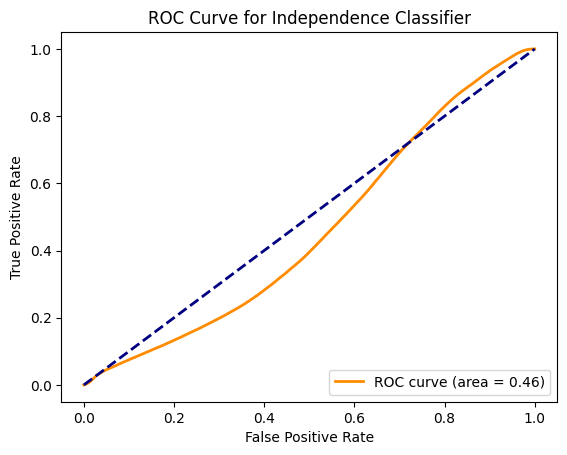

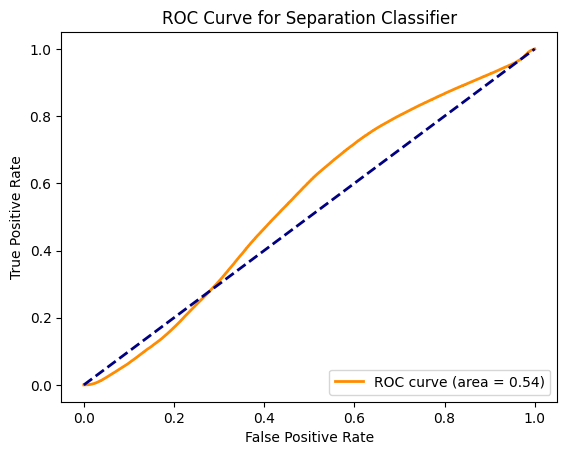

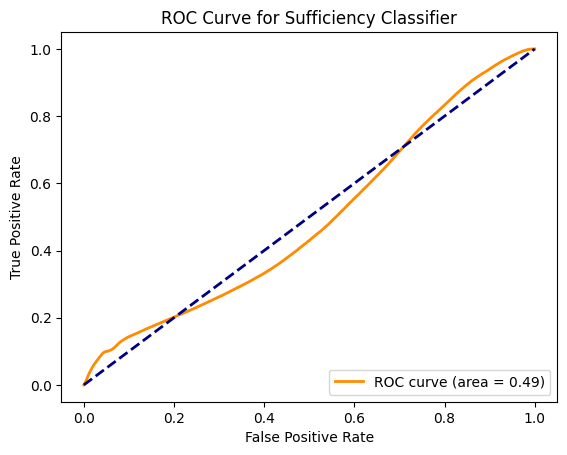

{'accuracy': 0.9364089689084314,
 'precision': 0.5509393063583815,
 'roc_auc': 0.8356942388700688,
 'confusion_matrix': array([[1213637,    1243],
        [  81278,    1525]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.55      0.02      0.04     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.74      0.51      0.50   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   1.646253127880943e-06,
   1.646253127880943e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   7.408139075464243e-06,
   7.408139075464243e-06,
   8.231265639404716e-06,
   8.231265639404716e-06,
   9.054392203345186e-06,
   9.054392203345186e-06,
   9.877518767285658e-06,
   9.8775187672856

In [12]:
test_model(
    mitigator5,
    scaler5,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)

In [13]:
mitigator10, scaler10 = fit_adversarial_regressor(
    alpha=10,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.505778. Average predictor loss: 0.285001
Current alpha 10, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.252408, Predictor Loss: 5.919264
Epoch 2/12, Average adversary loss: 0.502311. Average predictor loss: 0.288821
Current alpha 10, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.050740, Predictor Loss: 5.784320
Epoch 3/12, Average adversary loss: 0.501778. Average predictor loss: 0.260913
Current alpha 10, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.029269, Predictor Loss: 2.676172
Epoch 4/12, Average adversary loss: 0.501571. Average predictor loss: 0.212226
Current alpha 10, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 5.001912, Predictor Loss: 1.736624
Epoch 5/12, Average adversary loss: 0.502090. Average predictor loss: 0.275434
Current alpha 10, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 5.047566, Predictor Loss: 2.822087
Epoch 6/12, Average adversary loss:

Prediction probabilities: [0.01375716 0.00255231 0.00653605 0.01057712 0.33617368]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9365
Precision: 0.6329
ROC AUC: 0.8414
Confusion Matrix:
[[1214286     594]
 [  81779    1024]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.63      0.01      0.02     82803

    accuracy                           0.94   1297683
   macro avg       0.78      0.51      0.50   1297683
weighted avg       0.92      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.0076038575075212415, 'separation': 0.00431380358945983, 'sufficiency': 0.0016712471103954585}, 'std_metrics': {'independence': 5.6969504020862864e-05, 'separation': 4.298902168853444e-05, 'sufficiency': 2.6551632999548757e-05}}


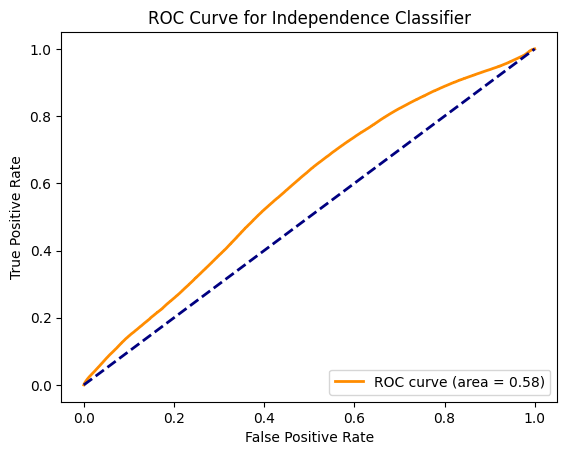

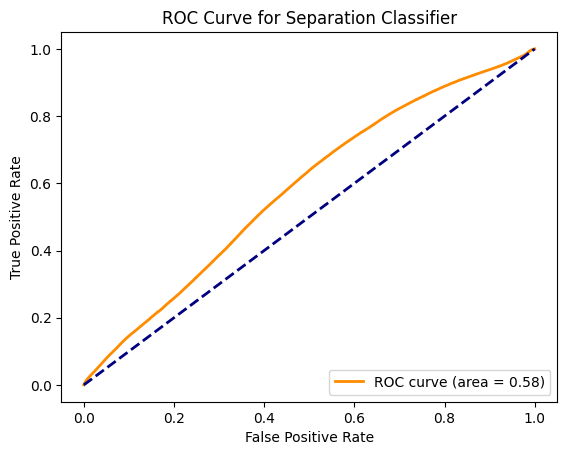

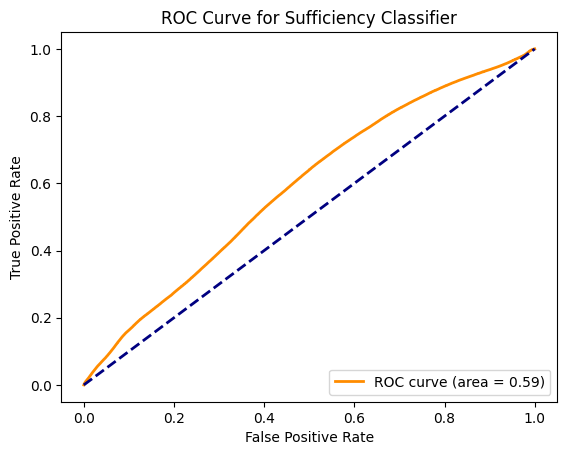

{'accuracy': 0.9365230183334451,
 'precision': 0.6328800988875154,
 'roc_auc': 0.8413774980838984,
 'confusion_matrix': array([[1214286,     594],
        [  81779,    1024]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.63      0.01      0.02     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.78      0.51      0.50   1297683\nweighted avg       0.92      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   1.646253127880943e-06,
   1.646253127880943e-06,
   2.4693796918214146e-06,
   2.4693796918214146e-06,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   6.585012511523772e-06,
   6.585012511523772e-06,
   7.408139075464243e-06,
   7.408139075464243e-06,
   8.231265639404716e-06,
   8.23126563940

In [14]:
test_model(
    mitigator10,
    scaler10,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)

In [15]:
mitigator50, scaler50 = fit_adversarial_regressor(
    alpha=50,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.507030. Average predictor loss: 0.561083
Current alpha 50, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.043692, Predictor Loss: 2.045426
Epoch 2/12, Average adversary loss: 0.502079. Average predictor loss: 0.417368
Current alpha 50, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.031825, Predictor Loss: 5.504531
Epoch 3/12, Average adversary loss: 0.501926. Average predictor loss: 0.439114
Current alpha 50, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.027921, Predictor Loss: 3.080543
Epoch 4/12, Average adversary loss: 0.501726. Average predictor loss: 0.366575
Current alpha 50, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 4.988722, Predictor Loss: 6.021869
Epoch 5/12, Average adversary loss: 0.501668. Average predictor loss: 0.379757
Current alpha 50, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 4.967067, Predictor Loss: 1.616292
Epoch 6/12, Average adversary loss:

Prediction probabilities: [0.01804565 0.00398896 0.0066239  0.01079351 0.22892676]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9362
Precision: 0.5081
ROC AUC: 0.8147
Confusion Matrix:
[[1212827    2053]
 [  80682    2121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.51      0.03      0.05     82803

    accuracy                           0.94   1297683
   macro avg       0.72      0.51      0.51   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.012066967937802986, 'separation': 0.020639086999501514, 'sufficiency': 0.013603730386629844}, 'std_metrics': {'independence': 6.878407188695349e-05, 'separation': 8.408951359666032e-05, 'sufficiency': 7.25298551811374e-05}}


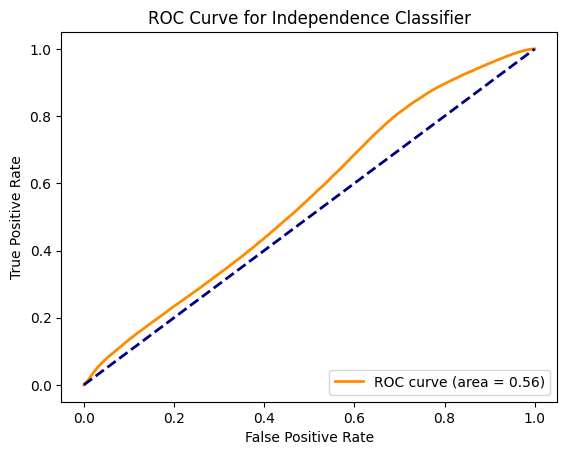

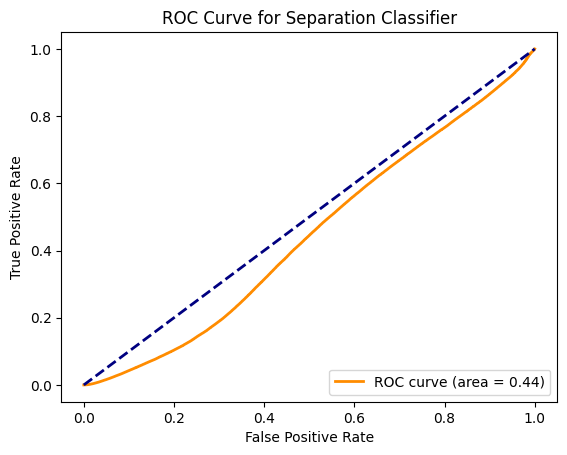

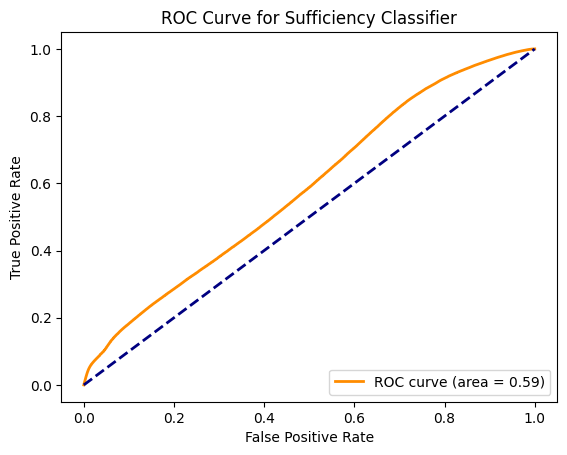

{'accuracy': 0.9362440596046955,
 'precision': 0.5081456636320076,
 'roc_auc': 0.8147163015452068,
 'confusion_matrix': array([[1212827,    2053],
        [  80682,    2121]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.51      0.03      0.05     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.72      0.51      0.51   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   1.646253127880943e-06,
   1.646253127880943e-06,
   2.4693796918214146e-06,
   2.4693796918214146e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   9.054392203345186e-06,
   9.054392203345186e-06,
   1.1523771895166601e-05,
   1.1523771895166601e-05,
   1.2346898459107072e-05,
   1.23468984

In [16]:
test_model(
    mitigator50,
    scaler50,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)

In [5]:
mitigator01, scaler01 = fit_adversarial_regressor(
    alpha=0.1,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.502621. Average predictor loss: 0.199457
Current alpha 0.1, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.127004, Predictor Loss: 1.577795
Epoch 2/12, Average adversary loss: 0.501196. Average predictor loss: 0.192465
Current alpha 0.1, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.110307, Predictor Loss: 1.571067
Epoch 3/12, Average adversary loss: 0.501299. Average predictor loss: 0.191721
Current alpha 0.1, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.083068, Predictor Loss: 1.553252
Epoch 4/12, Average adversary loss: 0.501266. Average predictor loss: 0.191638
Current alpha 0.1, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 5.088626, Predictor Loss: 1.539836
Epoch 5/12, Average adversary loss: 0.501284. Average predictor loss: 0.190467
Current alpha 0.1, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 5.049261, Predictor Loss: 1.538615
Epoch 6/12, Average adversary 

Prediction probabilities: [0.00479454 0.00239112 0.00479362 0.00846752 0.36070997]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9364
Precision: 0.5733
ROC AUC: 0.8352
Confusion Matrix:
[[1214190     690]
 [  81876     927]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.57      0.01      0.02     82803

    accuracy                           0.94   1297683
   macro avg       0.76      0.51      0.49   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.0001292522950399268, 'separation': 0.0016621856010962922, 'sufficiency': 0.006495544735028345}, 'std_metrics': {'independence': 6.8885106278976295e-06, 'separation': 2.253230443439321e-05, 'sufficiency': 4.798963726337387e-05}}


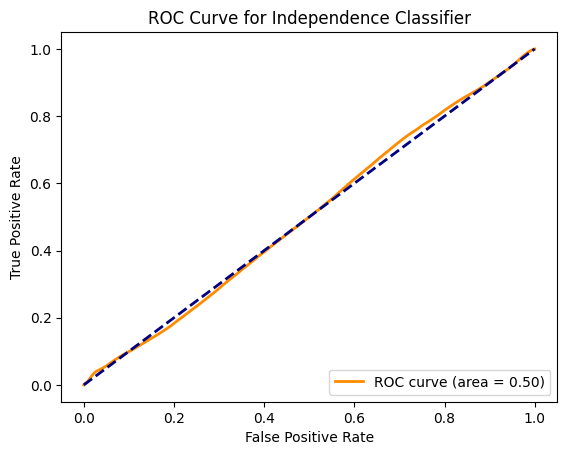

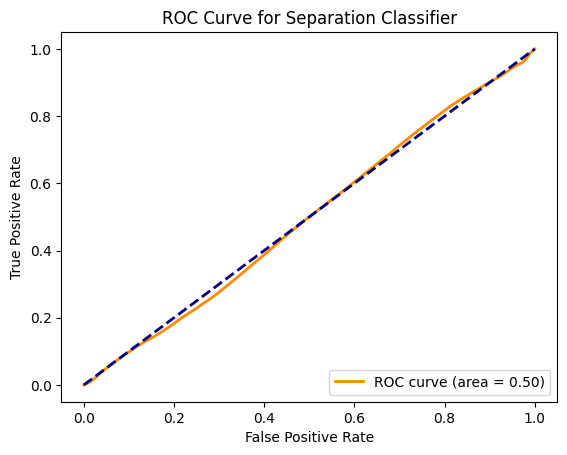

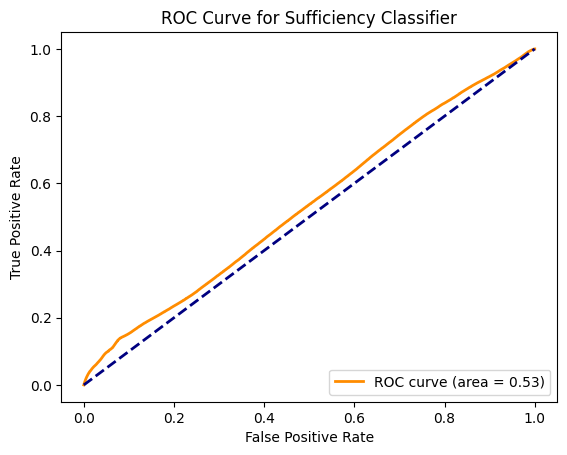

{'accuracy': 0.9363742917183935,
 'precision': 0.5732838589981447,
 'roc_auc': 0.8351521175038864,
 'confusion_matrix': array([[1214190,     690],
        [  81876,     927]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.57      0.01      0.02     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.76      0.51      0.49   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   6.585012511523772e-06,
   6.585012511523772e-06,
   8.231265639404716e-06,
   8.231265639404716e-06,
   9.877518767285658e-06,
   9.877518767285658e-06,
   1.0700645331226129e-05,
   1.0700645331226129e-05,
   1.1523771895166601e-05,
   1.152377189516

In [6]:
test_model(
    mitigator01,
    scaler01,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)